In [294]:
# Load global dataset and 
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Path to dataset which we will be using
dataset_path = '../../dataset/cleaned_csv_file_500.csv'
dataset_sim_path = './sim_cars.csv'
index_column_name = 'ID'

calculate_csv = False

In [295]:
# Load the dataset
df_cars = pd.read_csv(dataset_path)

# Drop any non-numeric columns, in this case, the 'ID' column
df_cars = df_cars.drop(columns=[index_column_name])

# Calculate the cosine similarity matrix
similarity_matrix = cosine_similarity(df_cars)

# Convert the similarity matrix to a DataFrame
similarity_df = pd.DataFrame(similarity_matrix)

In [296]:
# Save similarity matrix
similarity_df[index_column_name] = similarity_df.index + 1
similarity_df.set_index(index_column_name,inplace=True)

# Save the similarity DataFrame as a CSV file
similarity_df.to_csv(dataset_sim_path, index=False)

In [313]:
# Load the similarity matrix from file
df = pd.read_csv(dataset_sim_path)

# Convert the DataFrame into a single pandas Series
melted_df = df.melt()

# Calculate the median of all values
med = melted_df['value'].median()

print("Median of all values in the DataFrame:", med)

Median of all values in the DataFrame: 0.9825975796660096


In [314]:
df['ID'] = df.index + 1
df.set_index(index_column_name, inplace=True)
df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
ID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980842,0.980842,0.980842,0.980842,...,0.999790,0.999790,0.999790,0.999790,0.999790,0.999802,0.999802,0.999802,0.999802,0.999802
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980839,0.980839,0.980839,0.980839,...,0.999790,0.999790,0.999790,0.999790,0.999790,0.999801,0.999801,0.999801,0.999801,0.999801
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980842,0.980842,0.980842,0.980842,...,0.999790,0.999790,0.999790,0.999790,0.999790,0.999802,0.999802,0.999802,0.999802,0.999802
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980842,0.980842,0.980842,0.980842,...,0.999790,0.999790,0.999790,0.999790,0.999790,0.999802,0.999802,0.999802,0.999802,0.999802
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980842,0.980842,0.980842,0.980842,...,0.999790,0.999790,0.999790,0.999790,0.999790,0.999802,0.999802,0.999802,0.999802,0.999802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.999802,0.999801,0.999802,0.999802,0.999802,0.999802,0.978782,0.978782,0.978782,0.978782,...,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
497,0.999802,0.999801,0.999802,0.999802,0.999802,0.999802,0.978784,0.978784,0.978784,0.978784,...,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
498,0.999802,0.999801,0.999802,0.999802,0.999802,0.999802,0.978782,0.978782,0.978782,0.978782,...,0.999999,0.999999,0.999999,0.999999,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000


In [315]:
#converting into a numpy array and fixing the threshold
sim_matrix_numpy = np.array(df)
sim_matrix_numpy

array([[1.        , 0.99999965, 1.        , ..., 0.99980171, 0.99980165,
        0.99980171],
       [0.99999965, 1.        , 0.99999965, ..., 0.99980143, 0.99980101,
        0.99980143],
       [1.        , 0.99999965, 1.        , ..., 0.99980171, 0.99980165,
        0.99980171],
       ...,
       [0.99980171, 0.99980143, 0.99980171, ..., 1.        , 0.99999991,
        1.        ],
       [0.99980165, 0.99980101, 0.99980165, ..., 0.99999991, 1.        ,
        0.99999991],
       [0.99980171, 0.99980143, 0.99980171, ..., 1.        , 0.99999991,
        1.        ]])

In [316]:
#keeping only values above threshold and making others as 0.
similarity_thres = []
for i in sim_matrix_numpy:
    f1=[]
    for k in i:
        if(k==1):
            f1.append(0)
        elif(k>=med):
            f1.append(1)
        else:
            f1.append(0)
    similarity_thres.append(f1)

In [320]:
# Create a new dataframe using the boolean matrix
sim_bool_matrix_df = pd.DataFrame(similarity_thres)
sim_bool_matrix_df

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,0,1,0,1,0
496,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,0,1,0,1
497,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,0,1,0,1,0
498,1,1,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,0,1,0,1


In [228]:
#renaming the columns of the new dataframe.
sim_bool_matrix_df.rename(columns={0:"X1",1:"X3",2:"X4",3:"X6",4:"X8",5:"X10",6:"X13"},inplace=True)

In [229]:
#reindexing to start from 1
sim_bool_matrix_df.index = sim_bool_matrix_df.index+1

In [230]:
#creating an index column to get the label in the desired format.
sim_bool_matrix_df['DOC'] = (sim_bool_matrix_df.index)
sim_bool_matrix_df['X']= "X"
sim_bool_matrix_df['DOC2'] = sim_bool_matrix_df['X']+sim_bool_matrix_df['DOC'].astype(str)
del sim_bool_matrix_df['DOC'],sim_bool_matrix_df['X']

sim_bool_matrix_df

,X1,X3,X4,X6,X8,X10,X13,DOC2
1,0,0,0,0,1,1,0,X1
2,0,0,1,0,0,0,0,X2
3,0,0,0,1,0,0,1,X3
4,0,0,0,0,0,0,0,X4
5,0,0,0,1,0,0,0,X5
6,0,1,0,0,0,0,1,X6
7,0,0,1,0,0,0,0,X7
8,1,0,0,0,0,1,0,X8
9,1,0,1,0,1,0,0,X9
10,1,0,0,0,1,0,1,X10


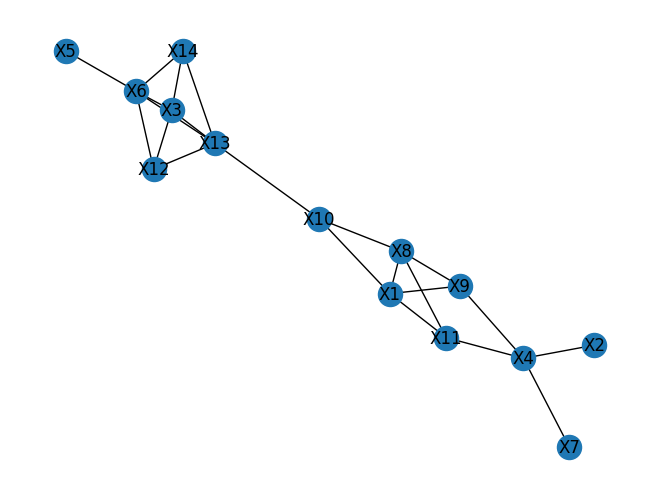

In [231]:
#plotting the network 
import networkx as nx
import matplotlib.pyplot as plt
stacked = sim_bool_matrix_df.set_index(['DOC2']).stack()
stacked = stacked[stacked==1]
edges = stacked.index.tolist()
#print(il1)
#edges
G = nx.Graph(edges)
Gp = nx.bipartite.projected_graph(G,sim_bool_matrix_df.set_index('DOC2').columns)
Gp.edges()
#pos = {node:[0, i] for i,node in enumerate(il1['DOC2'])}
#pos.update({node:[1, i] for i,node in enumerate(il1['level_1'])})
nx.draw(G, with_labels=True)
#for p in pos:  # raise text positions
 #   pos[p][1] += .25
#nx.draw_networkx_labels(G,pos=pos)

plt.show()

In [232]:
sim_bool_matrix_df

,X1,X3,X4,X6,X8,X10,X13,DOC2
1,0,0,0,0,1,1,0,X1
2,0,0,1,0,0,0,0,X2
3,0,0,0,1,0,0,1,X3
4,0,0,0,0,0,0,0,X4
5,0,0,0,1,0,0,0,X5
6,0,1,0,0,0,0,1,X6
7,0,0,1,0,0,0,0,X7
8,1,0,0,0,0,1,0,X8
9,1,0,1,0,1,0,0,X9
10,1,0,0,0,1,0,1,X10


In [233]:
# # Generate random data
# # Set a random seed for reproducibility (optional)
# np.random.seed(42)

# # Generate a 14x7 matrix with random float data
# matrix = np.random.rand(14, 7)

# # Choose 5 random positions to replace with NaN
# num_values_to_remove = 5
# rows = np.random.randint(0, matrix.shape[0], num_values_to_remove)
# cols = np.random.randint(0, matrix.shape[1], num_values_to_remove)

# matrix_backup = matrix.copy()

# # Replace the chosen positions with NaN
# for row, col in zip(rows, cols):
#     matrix[row, col] = np.nan
    
# # Load the matrix into a pandas DataFrame with the specified column names
# column_names = ['X1', 'X3', 'X4', 'X6', 'X8', 'X10', 'X13']

# matrix_data = pd.DataFrame(matrix, columns=column_names)

# # matrix_data['DOC'] = matrix_data.index + 1

# # Print the DataFrame
# matrix_data

In [234]:
##Reading the original dataset and performing the same to create labels and reindex.
dataset = pd.read_csv('SDD.csv')
dataset.index = dataset.index+1
dataset['DOC'] = (dataset.index)
dataset['X']= "X"
dataset['index'] = dataset['X']+dataset['DOC'].astype(str)
del dataset['DOC'],dataset['X']

dataset

,NTP,PG,DBP,TSFT,2HS1,BMI,AGE,DPF,index
1,6,148,72,35,67,33.6,50,NaN,X1
2,1,153,90,31,62,43.3,32,0.372,X2
3,1,85,66,29,94,26.6,31,NaN,X3
4,4,137,40,35,60,43.1,33,NaN,X4
5,5,116,74,21,80,25.6,30,0.588,X5
6,1,89,66,23,86,28.1,21,NaN,X6
7,2,117,48,35,45,42.5,32,0.348,X7
8,11,145,96,33,74,34.9,54,NaN,X8
9,3,157,92,34,55,40.5,59,0.501,X9
10,10,115,72,31,70,35.3,29,NaN,X10


In [235]:
#splitting the null values and creating a new dataframe using the similarity boolean matrix.
#dataset.set_index('index',inplace=True)
dataset
null_data = dataset[dataset.isnull().any(axis=1)]
similarity_bool = sim_bool_matrix_df.copy()
similarity_bool.set_index('DOC2',inplace=True)


In [236]:
#Resetting the index and deleting the index column
similarity_bool.reset_index(inplace=True)
#del similarity_bool['index']

In [237]:
#del similarity_bool['level_0']

In [238]:
## Taking only values above threshold but instead of converting it into 0 & 1 , we are keeping the similarity score as such.
similarity_thres1 = []
for i in sim_matrix_numpy:
    f1=[]
    for k in i:
        if(k==1):
            f1.append(0)
        elif(k>=med):
            f1.append(k)
        else:
            f1.append(0)
    similarity_thres1.append(f1)

In [239]:
##sscore is a new dataframe with the above scores.
sscore = pd.DataFrame(similarity_thres1)
sscore.rename(columns={0:"X1",1:"X3",2:"X4",3:"X6",4:"X8",5:"X10",6:"X13"},inplace=True)
sscore.index = sscore.index+1
sscore['DOC'] = (sscore.index)
sscore['X']= "X"
sscore['DOC2'] = sscore['X']+sscore['DOC'].astype(str)
del sscore['DOC'],sscore['X']
#sscore.set_index('DOC2',inplace=True)
print(sscore)

       X1     X3     X4     X6     X8    X10    X13 DOC2
1   0.000  0.000  0.000  0.000  0.928  0.800  0.000   X1
2   0.000  0.000  0.870  0.000  0.000  0.000  0.000   X2
3   0.000  0.000  0.000  0.845  0.000  0.000  0.858   X3
4   0.000  0.000  0.000  0.000  0.000  0.000  0.000   X4
5   0.000  0.000  0.000  0.838  0.000  0.000  0.000   X5
6   0.000  0.845  0.000  0.000  0.000  0.000  0.786   X6
7   0.000  0.000  0.887  0.000  0.000  0.000  0.000   X7
8   0.928  0.000  0.000  0.000  0.000  0.822  0.000   X8
9   0.814  0.000  0.844  0.000  0.840  0.000  0.000   X9
10  0.800  0.000  0.000  0.000  0.822  0.000  0.823  X10
11  0.836  0.000  0.802  0.000  0.836  0.000  0.000  X11
12  0.000  0.890  0.000  0.925  0.000  0.000  0.817  X12
13  0.000  0.858  0.000  0.785  0.000  0.823  0.000  X13
14  0.000  0.897  0.000  0.829  0.000  0.000  0.794  X14


In [240]:
#doing stacked to only take the values not equal to 0.0 and then unstacking it.
stacked1 = sscore.set_index(['DOC2']).stack()
#print(stacked1)
stacked1 = stacked1[stacked1 != 0.0]
print(stacked1)
edges = stacked1.index.tolist()
print(edges)
unstacked = stacked1.unstack()
print(unstacked)

DOC2     
X1    X8     0.928
      X10    0.800
X2    X4     0.870
X3    X6     0.845
      X13    0.858
X5    X6     0.838
X6    X3     0.845
      X13    0.786
X7    X4     0.887
X8    X1     0.928
      X10    0.822
X9    X1     0.814
      X4     0.844
      X8     0.840
X10   X1     0.800
      X8     0.822
      X13    0.823
X11   X1     0.836
      X4     0.802
      X8     0.836
X12   X3     0.890
      X6     0.925
      X13    0.817
X13   X3     0.858
      X6     0.785
      X10    0.823
X14   X3     0.897
      X6     0.829
      X13    0.794
dtype: float64
[('X1', 'X8'), ('X1', 'X10'), ('X2', 'X4'), ('X3', 'X6'), ('X3', 'X13'), ('X5', 'X6'), ('X6', 'X3'), ('X6', 'X13'), ('X7', 'X4'), ('X8', 'X1'), ('X8', 'X10'), ('X9', 'X1'), ('X9', 'X4'), ('X9', 'X8'), ('X10', 'X1'), ('X10', 'X8'), ('X10', 'X13'), ('X11', 'X1'), ('X11', 'X4'), ('X11', 'X8'), ('X12', 'X3'), ('X12', 'X6'), ('X12', 'X13'), ('X13', 'X3'), ('X13', 'X6'), ('X13', 'X10'), ('X14', 'X3'), ('X14', 'X6'), ('X14', 'X

In [241]:
#creating the incomplete_tuples and complete_tuples from the unstacked dataframe.
print(unstacked)
##To determine the P value
incomplete_tuples = unstacked.columns.to_list()
total_tuples = unstacked.index.to_list()
complete_tuples = list(set(total_tuples) - set(incomplete_tuples))
print(incomplete_tuples)
print(complete_tuples)


         X1     X3     X4     X6     X8    X10    X13
DOC2                                                 
X1      NaN    NaN    NaN    NaN  0.928  0.800    NaN
X2      NaN    NaN  0.870    NaN    NaN    NaN    NaN
X3      NaN    NaN    NaN  0.845    NaN    NaN  0.858
X5      NaN    NaN    NaN  0.838    NaN    NaN    NaN
X6      NaN  0.845    NaN    NaN    NaN    NaN  0.786
X7      NaN    NaN  0.887    NaN    NaN    NaN    NaN
X8    0.928    NaN    NaN    NaN    NaN  0.822    NaN
X9    0.814    NaN  0.844    NaN  0.840    NaN    NaN
X10   0.800    NaN    NaN    NaN  0.822    NaN  0.823
X11   0.836    NaN  0.802    NaN  0.836    NaN    NaN
X12     NaN  0.890    NaN  0.925    NaN    NaN  0.817
X13     NaN  0.858    NaN  0.785    NaN  0.823    NaN
X14     NaN  0.897    NaN  0.829    NaN    NaN  0.794
['X1', 'X3', 'X4', 'X6', 'X8', 'X10', 'X13']
['X9', 'X11', 'X2', 'X5', 'X14', 'X7', 'X12']


In [242]:
#creating a new column in unstacked to house the index values.
unstacked['indexed'] = unstacked.index

In [243]:
#filling the unstacked df for NaN
unstacked.fillna(0,inplace=True)
#del unstacked['index']

In [244]:
#Keeping only complete neighbours for the incomplete tuples in this "inc_complete" dataframe.
inc_complete = unstacked[~unstacked['indexed'].isin(incomplete_tuples)]
print(inc_complete)
#inc_complete
#Keeping only incomplete neighbours for the incomplete tuples in this "inc_complete" dataframe.
inc_incomplete =unstacked[unstacked['indexed'].isin(incomplete_tuples)]
print(inc_incomplete)

         X1     X3     X4     X6     X8  X10    X13 indexed
DOC2                                                       
X2    0.000  0.000  0.870  0.000  0.000  0.0  0.000      X2
X5    0.000  0.000  0.000  0.838  0.000  0.0  0.000      X5
X7    0.000  0.000  0.887  0.000  0.000  0.0  0.000      X7
X9    0.814  0.000  0.844  0.000  0.840  0.0  0.000      X9
X11   0.836  0.000  0.802  0.000  0.836  0.0  0.000     X11
X12   0.000  0.890  0.000  0.925  0.000  0.0  0.817     X12
X14   0.000  0.897  0.000  0.829  0.000  0.0  0.794     X14
         X1     X3   X4     X6     X8    X10    X13 indexed
DOC2                                                       
X1    0.000  0.000  0.0  0.000  0.928  0.800  0.000      X1
X3    0.000  0.000  0.0  0.845  0.000  0.000  0.858      X3
X6    0.000  0.845  0.0  0.000  0.000  0.000  0.786      X6
X8    0.928  0.000  0.0  0.000  0.000  0.822  0.000      X8
X10   0.800  0.000  0.0  0.000  0.822  0.000  0.823     X10
X13   0.000  0.858  0.0  0.785  0.000  0

In [245]:
#Function to get complete neighbours and their similarities in a dictionary
#iterating over the columns in inc_complete, retrieving the complete neighbours for each incomplete tuple and putting them in a dictionary.
def incomplete_connection_creator(list_1,dict_1):
  listed = []
  listed1= []
  inc_complete = list_1
  incomplete_tuples = dict_1
  for column in inc_complete:
    name = column
    #print(name)
    kailai = (list(inc_complete[inc_complete[column] != 0.0].indexed))
    kailai1 = (list(inc_complete[inc_complete[column] != 0.0][column]))
    #print(kailai)
    listed.append(kailai)
    listed1.append(kailai1)
  #print(listed)
  zipped = zip(incomplete_tuples,listed)
  zipped1 = zip(incomplete_tuples,listed1)
  dict_da = dict(zipped)
  dict_db = dict(zipped1)
  return dict_da,dict_db

In [246]:
#Getting the complete neighbours and their similarity scores
data_dict,data_dict1 = incomplete_connection_creator(inc_complete,incomplete_tuples)
print(data_dict,"\n",data_dict1)

{'X1': ['X9', 'X11'], 'X3': ['X12', 'X14'], 'X4': ['X2', 'X7', 'X9', 'X11'], 'X6': ['X5', 'X12', 'X14'], 'X8': ['X9', 'X11'], 'X10': [], 'X13': ['X12', 'X14']} 
 {'X1': [0.814, 0.836], 'X3': [0.89, 0.897], 'X4': [0.87, 0.887, 0.844, 0.802], 'X6': [0.838, 0.925, 0.829], 'X8': [0.84, 0.836], 'X10': [], 'X13': [0.817, 0.794]}


In [247]:
##Calculating the p value for the final calculation of node weights.
import math
def p_value_calc(list_1,dict_1):
  incomplete_tuples = list_1
  data_dict = dict_1
  ##calculating the term (1/Xm)
  if len(incomplete_tuples) != 0:
    term = 1/(len(incomplete_tuples))
  else:
    term = 1
  ##Summing all the length of values present in the dictionary to get the total number of complete neighbours to the incomplete tuples.
  summing = sum(len(v) for v in data_dict.values())
  ##math.ceil to Round up to the next whole number for the product of summing and term.
  value_1 =math.ceil(term * summing)
  return value_1

In [248]:
#P-value :
p_value = p_value_calc(incomplete_tuples,data_dict)
print(p_value)

3


In [249]:
##Creating a dictionary to find out the number of similarity scores associated with each incomplete tuple. We get the length of the dictionary's values for a particular element.
def length_getter(list_a,dict_a):
  list_length = []
  incomplete_tuples = list_a
  data_dict1 = dict_a
  ## checking if element in incomplete_tuples
  for y in incomplete_tuples:
    ##for that element we check the similarity scores in data_dict1 dictionary
    for y in data_dict1:
      ##intializing total to 0
      total = 0
      #print("Element:",y)
      #referencing to fetch the similarity scores -> ex: data_dict1['X1']=[0.814,0.836]
      value_list = data_dict1[y]
      #print(value_list)
      ##Taking their length
      count = len(value_list)
      total += count
      ##appending individual length to a list
      list_length.append(total)
  #print(list_length)
  ##Creating the dictionary which contains the incomplete tuples and their associated value lengths.
  zipper=zip(incomplete_tuples,list_length)
  data_dict = dict(zipper)
  return data_dict

In [250]:
data_dict2 = length_getter(incomplete_tuples,data_dict1)
print(data_dict2)

{'X1': 2, 'X3': 2, 'X4': 4, 'X6': 3, 'X8': 2, 'X10': 0, 'X13': 2}


In [251]:
##Calculating the node weights and putting them in a dictionary function
def node_weight_calculator(dict_1,dict_2,tuple_1,value1):
  list_scores = [] 
  diction_1 = dict_1
  diction_2 = dict_2 
  tupled_1 = tuple_1 
  p_value = value1
  ## iterating over incomplete tuple  present in incomplete_tuples list.
  for ij in tupled_1:
    #calculating the length of each item in data_dict2
    length = (dict_2[ij])
    #if length is greater than 0 we calculate the similarity score, else we assign 0
    if length>0:
      multiply_list = []
      #iterate over the length so as to capture all the associate similarity pairs with each incomplete tuple.
      for i in range(length):
        sim_score = dict_1[ij][i]
        ##Calculating the part of node weight from the formula given in the paper.
        initial_calc = (1-sim_score)**(1/(p_value))
        ##appending to multiply_list the values of initial_calc
        multiply_list.append(initial_calc)
      #Multiplying all the initial_Calc associated with a element.
      weight_1 =np.prod(multiply_list)
      ##subtracting 1 from weight_1 as per formula and rounding it to three decimal places to get the final node weight.
      final_weight = round(1 - weight_1,3)
    else:
      #keeping node weight as 0 if there is no similarity
      final_weight = 0.0
    list_scores.append(final_weight)
  ##Creating the final dictionary which contains the incomplete tuple and its associated node weight.
  zipper_score = zip(tupled_1,list_scores)
  dict_output = dict(zipper_score)
  return dict_output


In [252]:
##Initial Node weight calculator
dict_scores = node_weight_calculator(data_dict1,data_dict2,incomplete_tuples,p_value)
print("Initial Node weight beofre Imputation Order calc:\n",dict_scores)

Initial Node weight beofre Imputation Order calc:
 {'X1': 0.688, 'X3': 0.775, 'X4': 0.923, 'X6': 0.872, 'X8': 0.703, 'X10': 0.0, 'X13': 0.665}


In [253]:
##Incomplete- Incomplete connections and similarities
data_dict_inc,data_dict_inc_1 = incomplete_connection_creator(inc_incomplete,incomplete_tuples)
print("Incomplete neighbours to incomplete tuples:\n",data_dict_inc)
print("Incomplete neighbours similarity Score:\n",data_dict_inc_1)

Incomplete neighbours to incomplete tuples:
 {'X1': ['X8', 'X10'], 'X3': ['X6', 'X13'], 'X4': [], 'X6': ['X3', 'X13'], 'X8': ['X1', 'X10'], 'X10': ['X1', 'X8', 'X13'], 'X13': ['X3', 'X6', 'X10']}
Incomplete neighbours similarity Score:
 {'X1': [0.928, 0.8], 'X3': [0.845, 0.858], 'X4': [], 'X6': [0.845, 0.785], 'X8': [0.928, 0.822], 'X10': [0.8, 0.822, 0.823], 'X13': [0.858, 0.786, 0.823]}


In [254]:
## Calculating the Node Weight like we did previously for the values.
##Creating a dictionary to find out the number of similarity scores associated with each incomplete tuple. We get the length of the dictionary's values for a particular element.
data_dict_2 = length_getter(incomplete_tuples,data_dict_inc_1)
print("Length of incomplete neighbours:\n",data_dict_2)

##Appending the node weight we have already calculated for these nodes.
print("Node Weights:",dict_scores)
score_list = []
score_list_name = []
removed_item =[]
for element in incomplete_tuples:
  if data_dict_2[element] > 0:
    score_list_name.append(element)
    score_list.append(dict_scores[element])    
  else:
    print("Removed")
    removed_item.append(element)
zip_score_final = zip(score_list_name,score_list)
data_final_scores = dict(zip_score_final)
print("removed item",removed_item)
print("Node Weights input to Greedy Algorithm:\n",data_final_scores)

Length of incomplete neighbours:
 {'X1': 2, 'X3': 2, 'X4': 0, 'X6': 2, 'X8': 2, 'X10': 3, 'X13': 3}
Node Weights: {'X1': 0.688, 'X3': 0.775, 'X4': 0.923, 'X6': 0.872, 'X8': 0.703, 'X10': 0.0, 'X13': 0.665}
Removed
removed item ['X4']
Node Weights input to Greedy Algorithm:
 {'X1': 0.688, 'X3': 0.775, 'X6': 0.872, 'X8': 0.703, 'X10': 0.0, 'X13': 0.665}


In [255]:
def incomplete_connection_creator1(list_1,dict_1):
  listed = []
  listed1= []
  inc_complete = list_1
  incomplete_tuples = dict_1
  #print(inc_complete)
  #print(incomplete_tuples)
  for column in inc_complete:
    for column in incomplete_tuples:
      name = column
      #print(name)
      kailai = (list(inc_complete[inc_complete[column] != 0.0].indexed))
      kailai1 = (list(inc_complete[inc_complete[column] != 0.0][column]))
      #print(kailai)
      listed.append(kailai)
      listed1.append(kailai1)
    #print("listed:",listed)
    zipped = zip(incomplete_tuples,listed)
    zipped1 = zip(incomplete_tuples,listed1)
    dict_da = dict(zipped)
    dict_db = dict(zipped1)
    return dict_da,dict_db

In [256]:
'''
GREEDY ALGORITHM TO FIND THE IMPUTATION ORDER
STEP 1: Find Node with Largest Weight. Keep it as the starting point
STEP 2: Calculate the Filling Gain to make it a complete Neighbour.
STEP 3: If the imputed Node, contains any connections to incomplete tuples then update their node weights by considering the imputed node
        as a completed neighbour.
STEP 4: Repeat this process untill all the incomplete tuples are imputed.
'''

##STEP 1: Find Node with Largest Weight. Keep it as the starting point
#Getting the data_final_scores
incomplete_tuples_score = data_final_scores
print("Incomplete Tuple Scores Before Iteration:",incomplete_tuples_score)
#updated_incomplete_tuples = incomplete_tuples.copy()
updated_incomplete_tuples = score_list_name.copy()
updated_complete_tuples = complete_tuples.copy()
final_greedy_order = []
print("Node Weight for incomplete tuples stored in a new dictionary:",incomplete_tuples_score)
################################################################################################
##########################:
for i in range(len(incomplete_tuples_score)):  
  max_value = max(incomplete_tuples_score, key=incomplete_tuples_score.get)
  print("Node With the largest weight:",max_value)
  print("Node weight:",incomplete_tuples_score[max_value])
  ##Calculate the Filling Gain
  #print("X is:",data_dict_2[max_value])
  #print("Pairs are :",data_dict_inc[max_value])
  if max_value in data_dict_2:
    list_score_holder = []
    final_gain_score_holder = []
    for i in range(data_dict_2[max_value]):
      w_label = data_dict_inc[max_value][i]
      w_score = incomplete_tuples_score[w_label]
      print("Connected pair and score :",w_label,w_score)
      list_score_holder.append(w_score)
      #print(data_dict_inc_1[max_value][i])
      #print(p_value)
      w_difference = round((incomplete_tuples_score[max_value] - list_score_holder[i]),3)
      #print(data_dict_inc_1[max_value][i])
      w_second_part =round((1-data_dict_inc_1[max_value][i])**(1/p_value),3)
      gain = round(((w_difference)*(1-w_second_part)),3)
      #print(w_difference)
      #print(w_second_part)
      #print("Gain is :",gain)
      final_gain_score_holder.append(gain)
      #print("Final Gain calculated:",final_gain_score_holder)
    gain_for_element = sum(final_gain_score_holder)
    print("Gain For incomplete tuple:",gain_for_element )
    updated_incomplete_tuples.remove(max_value)
    updated_complete_tuples.append(max_value)
    print("Updated_incomplete_tuples",updated_incomplete_tuples)
    print("Updated complete tuples",updated_complete_tuples)
    inc_complete_updated = unstacked[~unstacked['indexed'].isin(updated_incomplete_tuples)]
    data_dict_upd_1,data_dict_upd_2 = incomplete_connection_creator1(inc_complete_updated,updated_incomplete_tuples)
    upd_p_value = p_value_calc(updated_incomplete_tuples,data_dict_upd_1)
    data_dict_upd = length_getter(updated_incomplete_tuples,data_dict_upd_2)
    print("data_dict_upd_2:-",data_dict_upd_2)
    print("data_dict_upd_1:",data_dict_upd_1)
    print(max_value)
    new_dict = { k : v for k,v in data_dict_upd_1.items() if max_value in v}
    new_dict_scores = []
    new_dict_key = []
    for key,value in new_dict.items():
      new_value = data_dict_upd_2[key]
      new_dict_scores.append(new_value)
      new_key = key
      new_dict_key.append(key)
    new_zipped = zip(new_dict_key,new_dict_scores)
    new_dict_input = dict(new_zipped)
    print(new_dict_input)
    dict_scores_upd = node_weight_calculator(new_dict_input,data_dict_upd,new_dict_key,p_value)
    print("Updated Node weight before Imputation Order calc:\n",dict_scores_upd)
    dict_scores_upd.update({max_value:0.0})
    final_greedy_order.append(max_value)
    print("Appended:",dict_scores_upd)
    incomplete_tuples_score.update(dict_scores_upd)
    print("Updated Incomplete Tuples scores before proceeding to next iter",incomplete_tuples_score)
    print("----------------------------------------------------------------------------------------------------------------------")
print("Final Greedy Imputation order is",final_greedy_order)

##Creating the final order for feeding to the KNN
final_order = removed_item+final_greedy_order
print("final_order",final_order)
final_greedy_impute = []
for a in final_order:
  str_name = str(a)
  strip_name = str_name[1:]
  final_greedy_impute.append(int(strip_name))
print(final_greedy_impute)




Incomplete Tuple Scores Before Iteration: {'X1': 0.688, 'X3': 0.775, 'X6': 0.872, 'X8': 0.703, 'X10': 0.0, 'X13': 0.665}
Node Weight for incomplete tuples stored in a new dictionary: {'X1': 0.688, 'X3': 0.775, 'X6': 0.872, 'X8': 0.703, 'X10': 0.0, 'X13': 0.665}
Node With the largest weight: X6
Node weight: 0.872
Connected pair and score : X3 0.775
Connected pair and score : X13 0.665
Gain For incomplete tuple: 0.128
Updated_incomplete_tuples ['X1', 'X3', 'X8', 'X10', 'X13']
Updated complete tuples ['X9', 'X11', 'X2', 'X5', 'X14', 'X7', 'X12', 'X6']
data_dict_upd_2:- {'X1': [0.814, 0.836], 'X3': [0.845, 0.89, 0.897], 'X8': [0.84, 0.836], 'X10': [], 'X13': [0.786, 0.817, 0.794]}
data_dict_upd_1: {'X1': ['X9', 'X11'], 'X3': ['X6', 'X12', 'X14'], 'X8': ['X9', 'X11'], 'X10': [], 'X13': ['X6', 'X12', 'X14']}
X6
{'X3': [0.845, 0.89, 0.897], 'X13': [0.786, 0.817, 0.794]}
Updated Node weight before Imputation Order calc:
 {'X3': 0.879, 'X13': 0.799}
Appended: {'X3': 0.879, 'X13': 0.799, 'X6': 0

In [257]:
############################
#KNN Modelling Approach
dataset_1 = dataset.copy()
dataset_1 

,NTP,PG,DBP,TSFT,2HS1,BMI,AGE,DPF,index
1,6,148,72,35,67,33.6,50,NaN,X1
2,1,153,90,31,62,43.3,32,0.372,X2
3,1,85,66,29,94,26.6,31,NaN,X3
4,4,137,40,35,60,43.1,33,NaN,X4
5,5,116,74,21,80,25.6,30,0.588,X5
6,1,89,66,23,86,28.1,21,NaN,X6
7,2,117,48,35,45,42.5,32,0.348,X7
8,11,145,96,33,74,34.9,54,NaN,X8
9,3,157,92,34,55,40.5,59,0.501,X9
10,10,115,72,31,70,35.3,29,NaN,X10


In [258]:
dataset_1.set_index('index',inplace=True)
dataset_1

,NTP,PG,DBP,TSFT,2HS1,BMI,AGE,DPF
index,,,,,,,,
X1,6,148,72,35,67,33.6,50,NaN
X2,1,153,90,31,62,43.3,32,0.372
X3,1,85,66,29,94,26.6,31,NaN
X4,4,137,40,35,60,43.1,33,NaN
X5,5,116,74,21,80,25.6,30,0.588
X6,1,89,66,23,86,28.1,21,NaN
X7,2,117,48,35,45,42.5,32,0.348
X8,11,145,96,33,74,34.9,54,NaN
X9,3,157,92,34,55,40.5,59,0.501


In [259]:
##Order Imputed Sequential KNN 
##Creating a null empty array equal to the dataset size
dataset_array = dataset_1.to_numpy()
print("Dataset Converted into a Numpy Array:\n",dataset_array)
#imputed_data = np.zeros([len(dataset_1),len(dataset_1.columns)])
imputed_data = np.zeros_like(dataset_array)
print("\nZeroes Array\n",imputed_data)
#Creating Empty lists 
complete = []
incompleted = []
missing =[]
com_ind=[]
incomp_ind=[]
##Taking the rows and cols of the input dataset for iteration purpose
[rows,cols] = dataset_array.shape
print("\nNo of Rows are",rows)
print("No of Cols are",cols)
##iterating through the number of rows
for i in range(len(dataset_array)):
  a = dataset_array[i]
  #print("Row is ",a)
  nan_checker = np.sum(np.sum(a, axis=0))
  #print("Sum of Row is",nan_checker)
  if math.isnan(nan_checker) :
    #print("Spotted Nan Value - ",nan_checker)
    incompleted.append(a)
    incomp_ind.append(i+1)
    #print("Non Sum of non numbers",np.nansum(np.nansum(a, axis=0)))
  else:
    complete.append(a)
    com_ind.append(i+1)
zipped_com = zip(com_ind,complete)
dict_complete = dict(zipped_com)
##Ordering the list as per imputation order generated from Greedy
zipped_incom = zip(incomp_ind,incompleted)
dict_incompleted = dict(zipped_incom)
print(dict_incompleted)
sorted_incomplete =[(v,dict_incompleted[v]) for v in final_greedy_impute]
print(sorted_incomplete)
incom_ind = []
incomplete = []
for header in range(len(sorted_incomplete)):
  header_app = sorted_incomplete[header][0]
  value_app = sorted_incomplete[header][1]
  incom_ind.append(header_app)
  incomplete.append(value_app)
print(incom_ind)
print(incomplete)
incom_ind_1 = sorted_incomplete[0][0]
print(incom_ind_1)
for i in com_ind:
  imputed_data[i-1] = dict_complete[i]
print("Imputed Data After Filling the Complete Rows:\n",imputed_data)
print("Incomplete Rows in the Array\n",incomplete)

for k in incomplete:
  #print(k)
  dist = []
  cgen = len(complete)
  for j in range(cgen):
    #print(k)
    #print("j",j)
    #print(complete[j])
    d = np.nansum(np.power(([k]-complete[j]),2))
    dist.append(d)
  print("Distance Before Sort:",dist)  
  position=[]
  for l in range(len(dist)):
    position.append(l)
  zipped_pos = zip(position,dist)
  dict_pos = dict(zipped_pos)
  #print(dict_pos)
  from operator import itemgetter  
  dict_pos_sorted =  sorted(dict_pos.items(), key = itemgetter(1), reverse = False)
  print("Sorted Dictionary",dict_pos_sorted)
  K = 5
  cluster_dictionary = dict_pos_sorted[:5]
  print("K Cluster Dictionary",cluster_dictionary)
  k_dist = []
  k_weight = []
  k_final_weight = []
  for d,s in cluster_dictionary:
    k_dist.append(s)
  print("Retrieved K Distances",k_dist)
  #total_list_sum = sum(1/((k_dist)))
  #print(total_list_sum)
  for h in range(len(k_dist)):
    #weight = np.true_divide((1/k_dist[h]),)
    individual_weight = ((1/k_dist[h]))
    k_weight.append(individual_weight)
  for u in k_weight:
    final_weight = np.true_divide(u,sum(k_weight))
    k_final_weight.append(final_weight)
  #print("K Weight:",k_weight)   
  print("Final_Weight:",k_final_weight)
  #print(complete)
  for a in range(np.size(dataset_array,1)):
      complete_values_list =[] 
      column_value = k[a]
      if math.isnan(column_value):
        for o,p in cluster_dictionary:
          complete_value = complete[o][a]
          complete_values_list.append(complete_value)
        #print("Complete_value",complete_values_list)
        imputed_final_value = round(sum(f * e for f, e in zip(complete_values_list,k_final_weight)),3)
        print("-----------------------------------------------------------------------------------------")
        print("Final Imputed value:",imputed_final_value) 
        print("-----------------------------------------------------------------------------------------")
        k[a] = imputed_final_value
  complete.append(k)
incomplete_dataframe = pd.DataFrame(incomplete)
incomplete_dataframe['ind'] = incom_ind
incomplete_dataframe.set_index('ind',inplace=True)
imputed_data_frame = pd.DataFrame(imputed_data)
imputed_data_frame.index = imputed_data_frame.index+1
final_imputed_df = incomplete_dataframe.combine_first(imputed_data_frame)
final_imputed_df.columns = dataset_1.columns
print("------------------------------------------------------------------------")
print("------------------------------------------------------------------------")
print("Final Imputed Dataset:\n", final_imputed_df)
print("------------------------------------------------------------------------")
print("------------------------------------------------------------------------")
print("Completed")

Dataset Converted into a Numpy Array:
 [[  6.    148.     72.     35.     67.     33.6    50.        nan]
 [  1.    153.     90.     31.     62.     43.3    32.      0.372]
 [  1.     85.     66.     29.     94.     26.6    31.        nan]
 [  4.    137.     40.     35.     60.     43.1    33.        nan]
 [  5.    116.     74.     21.     80.     25.6    30.      0.588]
 [  1.     89.     66.     23.     86.     28.1    21.        nan]
 [  2.    117.     48.     35.     45.     42.5    32.      0.348]
 [ 11.    145.     96.     33.     74.     34.9    54.        nan]
 [  3.    157.     92.     34.     55.     40.5    59.      0.501]
 [ 10.    115.     72.     31.     70.     35.3    29.        nan]
 [ 10.    168.     74.     35.     72.     38.     34.      0.272]
 [  4.     88.     74.     25.     88.     28.     34.      0.537]
 [  3.     88.     50.     32.     82.     31.     26.        nan]
 [  5.     96.     62.     28.     90.     23.8    32.      0.698]]

Zeroes Array
 [[0. 0.